In [1]:
import numpy as np
import pandas as pd
import wrangle as w
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df, train, val, test = w.wrangle_data()

Opening data from local file.


In [17]:
df_clus = w.k_means_clustering(4)

Opening data from local file.
Cluster 1 Mean:
customer_age                       28.105851
sub_category_Bike Stands            0.001808
sub_category_Bottles and Cages      0.254438
sub_category_Caps                   0.076677
sub_category_Cleaners               0.024737
sub_category_Fenders                0.019888
sub_category_Gloves                 0.012410
sub_category_Helmets                0.048159
sub_category_Hydration Packs        0.004356
sub_category_Jerseys                0.024901
sub_category_Mountain Bikes         0.003698
sub_category_Road Bikes             0.001890
sub_category_Shorts                 0.005999
sub_category_Socks                  0.017751
sub_category_Tires and Tubes        0.499178
sub_category_Touring Bikes          0.000247
sub_category_Vests                  0.002794
revenue                           179.097304
dtype: float64

Cluster 2 Mean:
customer_age                       48.486637
sub_category_Bike Stands            0.003155
sub_category_Bottles a

In [19]:
df_clus.head(2).T

,0,1
date,2016-02-19 00:00:00,2016-02-20 00:00:00
year,2016,2016
month,February,February
customer_age,29,29
customer_gender,F,F
country,United States,United States
state,Washington,Washington
product_category,Accessories,Clothing
sub_category,Tires and Tubes,Gloves
quantity,1,2


In [20]:
train_clus, val_clus, test_clus = w.split_data(df_clus)

# Univarite Analysis

In [12]:
explore_cols = [
     'date',
     'year',
     'month',
     'customer_gender',
     'country',
     'state',
     'product_category',
     'sub_category',
     'quantity',
     'customer_age', 
     'unit_cost', 
     'unit_price', 
     'cost', 
     'revenue', 
     'total_price']

In [13]:
cat_cols, num_cols = [], []
for col in train.columns:
    if train[col].dtype == 'O':
        cat_cols.append(col)
    elif train[col].dtype == 'datetime64[ns]':
        cat_cols.append(col)
    else:
        if train[col].nunique() < 10:
            cat_cols.append(col)
        else:
            num_cols.append(col)

In [14]:
cat_cols

['date',
 'year',
 'month',
 'customer_gender',
 'country',
 'state',
 'product_category',
 'sub_category',
 'quantity',
 'sub_category_Bike Stands',
 'sub_category_Bottles and Cages',
 'sub_category_Caps',
 'sub_category_Cleaners',
 'sub_category_Fenders',
 'sub_category_Gloves',
 'sub_category_Helmets',
 'sub_category_Hydration Packs',
 'sub_category_Jerseys',
 'sub_category_Mountain Bikes',
 'sub_category_Road Bikes',
 'sub_category_Shorts',
 'sub_category_Socks',
 'sub_category_Tires and Tubes',
 'sub_category_Touring Bikes',
 'sub_category_Vests',
 'customer_gender_M',
 'country_Germany',
 'country_United Kingdom',
 'country_United States',
 'product_category_encoded']

In [15]:
num_cols

['customer_age', 'unit_cost', 'unit_price', 'cost', 'revenue', 'profit']

Univariate assessment of feature date:


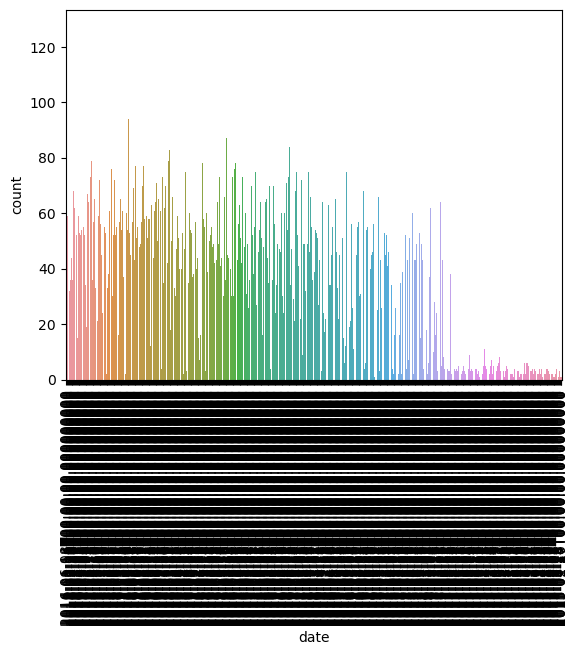

            date      date
2016-03-01   127  0.006505
2016-06-14    95  0.004866
2016-04-19    94  0.004815
2016-06-28    88  0.004507
2016-02-20    88  0.004507
...          ...       ...
2015-05-11     1  0.000051
2015-06-25     1  0.000051
2015-04-20     1  0.000051
2015-02-23     1  0.000051
2015-01-27     1  0.000051

[567 rows x 2 columns]
------------------------------
------------------------------
Univariate assessment of feature year:


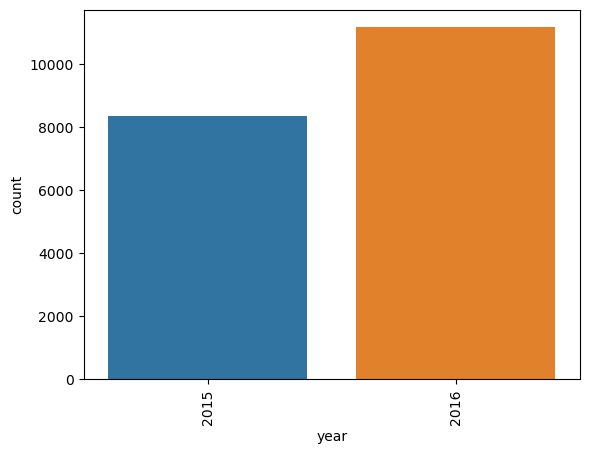

       year      year
2016  11171  0.572168
2015   8353  0.427832
------------------------------
------------------------------
Univariate assessment of feature month:


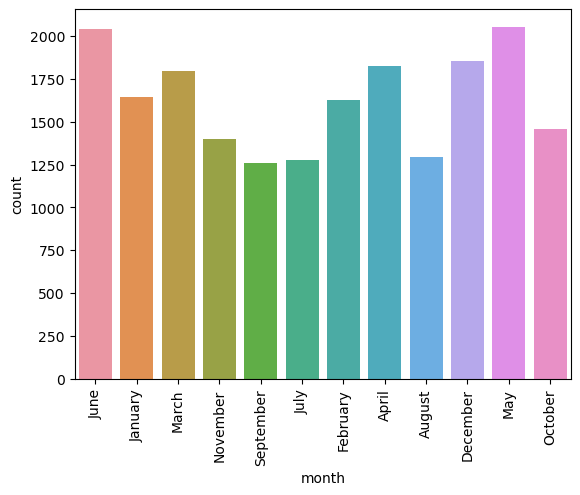

           month     month
May         2052  0.105101
June        2043  0.104640
December    1851  0.094806
April       1827  0.093577
March       1798  0.092092
January     1642  0.084102
February    1624  0.083180
October     1456  0.074575
November    1401  0.071758
August      1295  0.066329
July        1275  0.065304
September   1260  0.064536
------------------------------
------------------------------
Univariate assessment of feature customer_gender:


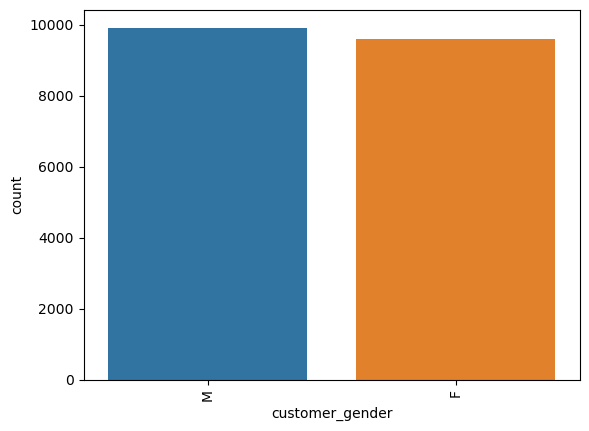

   customer_gender  customer_gender
M             9919         0.508041
F             9605         0.491959
------------------------------
------------------------------
Univariate assessment of feature country:


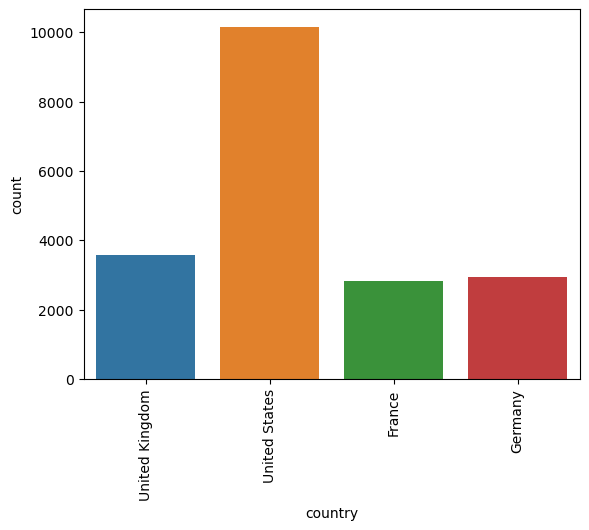

                country   country
United States     10154  0.520078
United Kingdom     3594  0.184081
Germany            2959  0.151557
France             2817  0.144284
------------------------------
------------------------------
Univariate assessment of feature state:


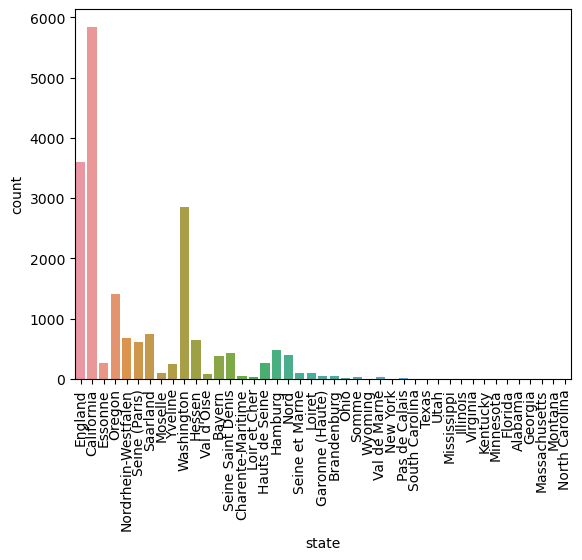

                     state     state
California            5842  0.299221
England               3594  0.184081
Washington            2856  0.146281
Oregon                1407  0.072065
Saarland               744  0.038107
Nordrhein-Westfalen    672  0.034419
Hessen                 639  0.032729
Seine (Paris)          619  0.031705
Hamburg                480  0.024585
Seine Saint Denis      438  0.022434
Nord                   397  0.020334
Bayern                 378  0.019361
Hauts de Seine         267  0.013675
Essonne                259  0.013266
Yveline                246  0.012600
Loiret                 104  0.005327
Seine et Marne         100  0.005122
Moselle                 95  0.004866
Val d'Oise              75  0.003841
Garonne (Haute)         54  0.002766
Brandenburg             46  0.002356
Charente-Maritime       42  0.002151
Val de Marne            38  0.001946
Somme                   35  0.001793
Loir et Cher            25  0.001280
Pas de Calais           23  0.001178
O

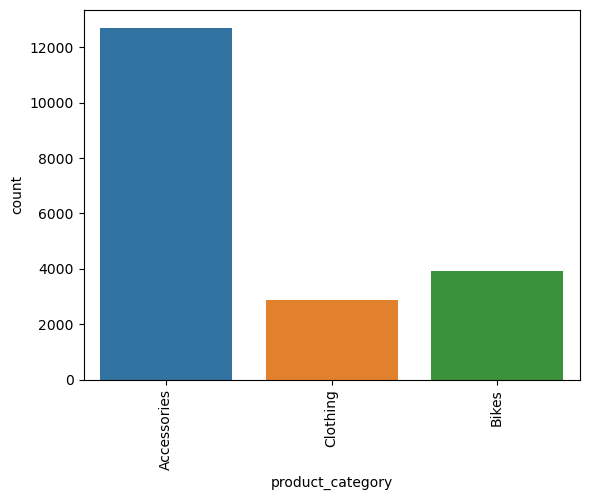

             product_category  product_category
Accessories             12716          0.651301
Bikes                    3916          0.200574
Clothing                 2892          0.148125
------------------------------
------------------------------
Univariate assessment of feature sub_category:


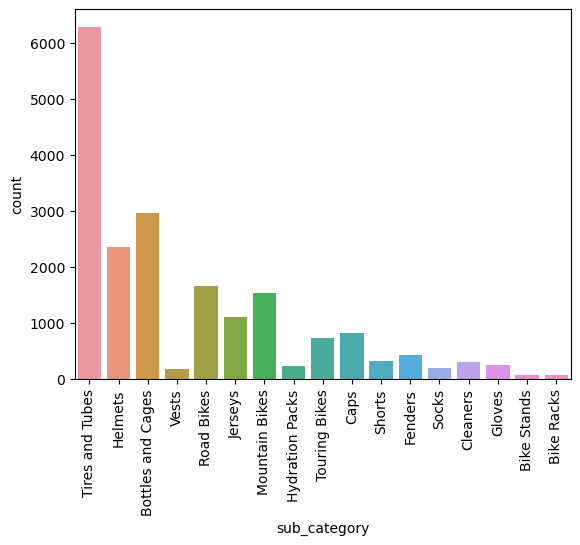

                   sub_category  sub_category
Tires and Tubes            6284      0.321860
Bottles and Cages          2969      0.152069
Helmets                    2356      0.120672
Road Bikes                 1653      0.084665
Mountain Bikes             1530      0.078365
Jerseys                    1111      0.056904
Caps                        824      0.042204
Touring Bikes               733      0.037544
Fenders                     422      0.021614
Shorts                      316      0.016185
Cleaners                    304      0.015571
Gloves                      260      0.013317
Hydration Packs             236      0.012088
Socks                       199      0.010193
Vests                       182      0.009322
Bike Stands                  81      0.004149
Bike Racks                   64      0.003278
------------------------------
------------------------------
Univariate assessment of feature quantity:


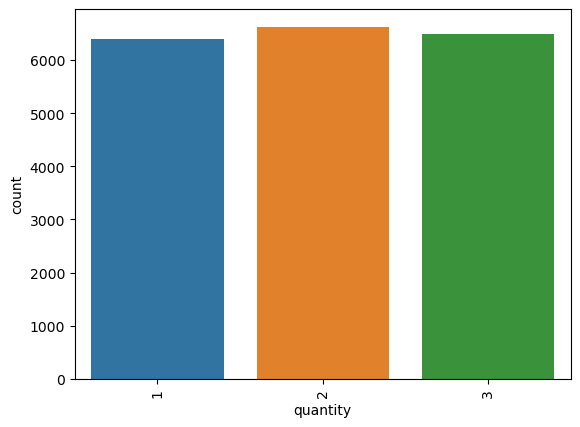

   quantity  quantity
2      6627  0.339428
3      6495  0.332667
1      6402  0.327904
------------------------------
------------------------------
Univariate Feature analysis of feature customer_age:


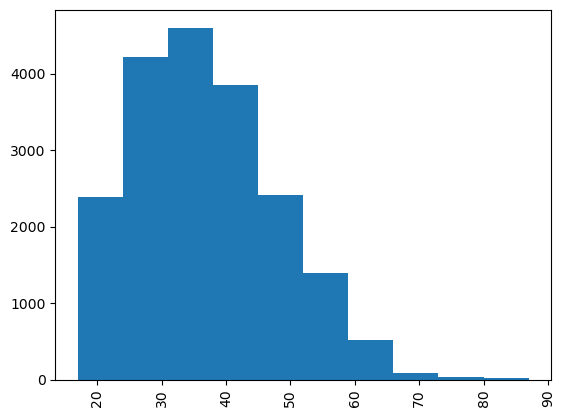

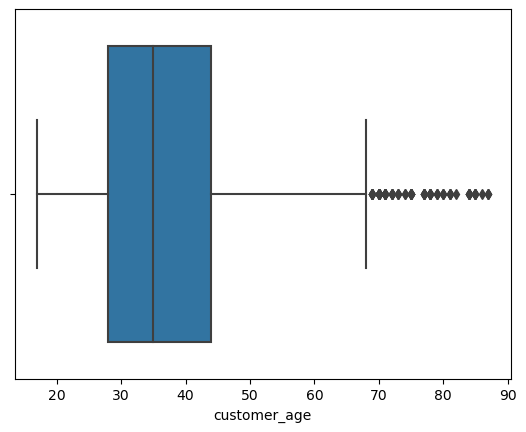

------------------------------
------------------------------
Univariate Feature analysis of feature unit_cost:


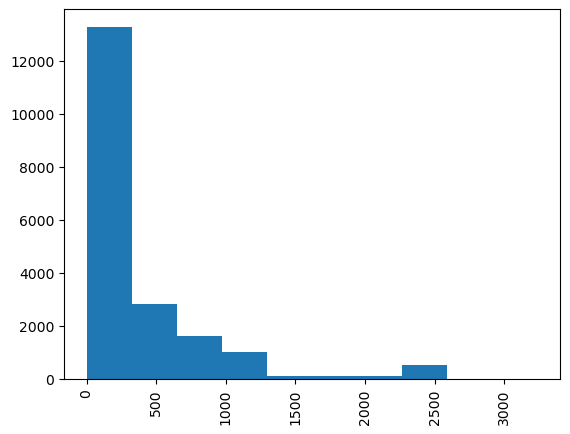

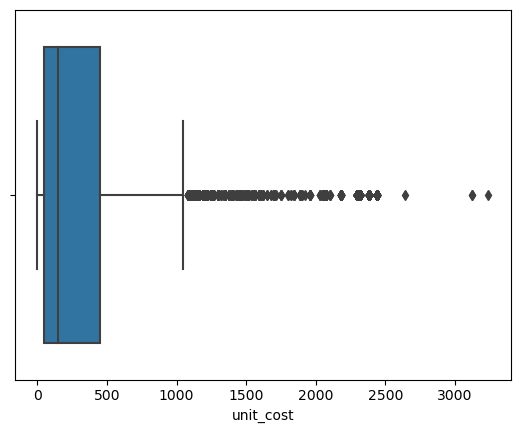

------------------------------
------------------------------
Univariate Feature analysis of feature unit_price:


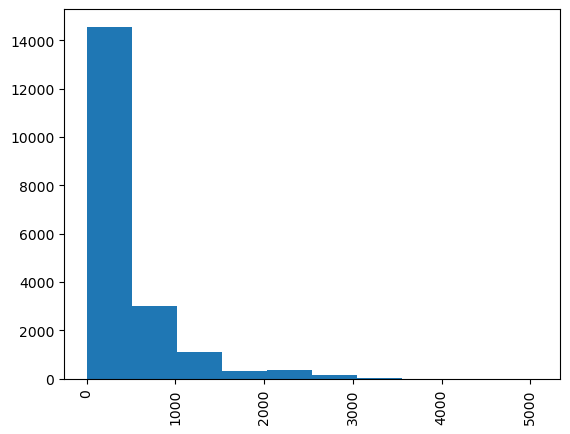

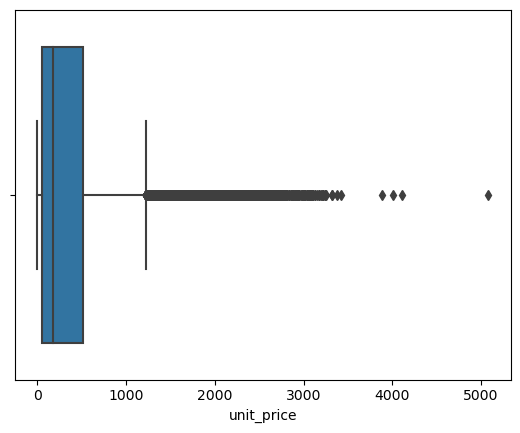

------------------------------
------------------------------
Univariate Feature analysis of feature cost:


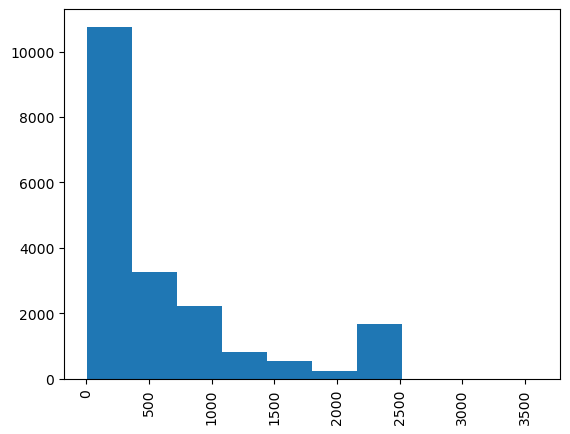

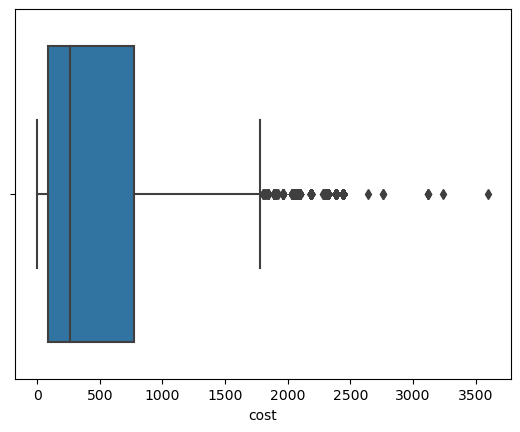

------------------------------
------------------------------
Univariate Feature analysis of feature revenue:


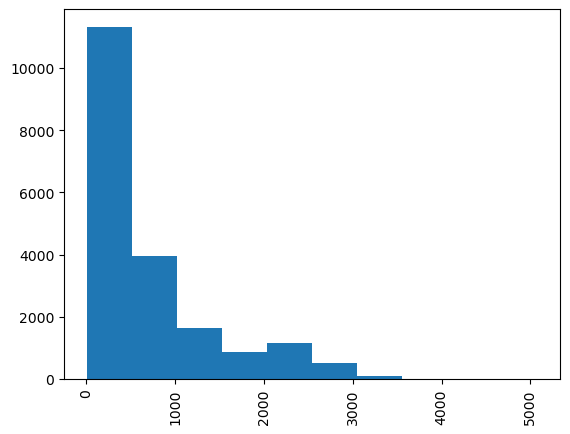

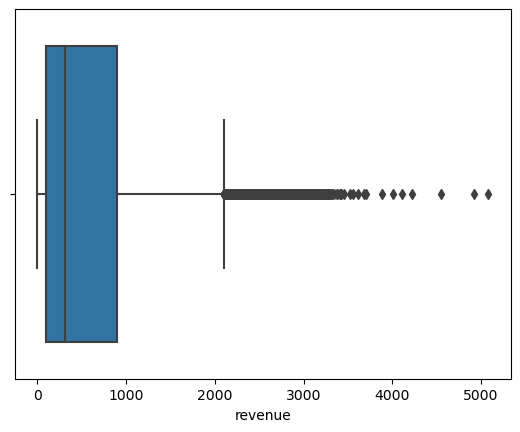

------------------------------
------------------------------
Univariate Feature analysis of feature total_price:


KeyError: 'total_price'

In [16]:
for col in explore_cols:
    if col in cat_cols:
        print(f'Univariate assessment of feature {col}:')
        sns.countplot(data=train, x=col)
        plt.xticks(rotation=90)
        plt.show()
        print(
            pd.concat([train[col].value_counts(),
            train[col].value_counts(normalize=True)],
                 axis=1))
    else:
        print(f'Univariate Feature analysis of feature {col}:')
        plt.hist(train[col])
        plt.xticks(rotation=90)
        plt.show()
        sns.boxplot(data=train, x=col)
#         plt.xticks(rotation=90)
        plt.show()
        train[col].describe()
    print('------------------------------')
    print('------------------------------')

### Findings: 
- May and June are the highest selling months, followed by December and April
- 50% of our customer are aged 28-44
- Gender is about equal among customers
- USA has ordered over 2x as many times as the other countries
- California, Washington and Oregon have the highest number of sales
- Accessories are sold almost 3x as much as other categories
- 'Tires and Tubes', 'Bottles and Cages' and Helmets are the highest selling sub categories

## Bivariate

In [ ]:
def get_corr_heatmap(train, num_cols):
    '''
    This function will display a heatmap of the potential correlations between variables in 
    our dataset
    '''
    # get the correlation values
    corr_matrix = train[num_cols].corr()
    # create a plot
    plt.figure(figsize=(10,10))
    # plot a heatmap of the correlations
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    # add a title
    plt.title('Heat Map of Correlation')
    # display the plot
    plt.show()

In [ ]:
def get_pairplot(train, num_cols):
    '''
    This function will take in a dataFrame, and will display a pairplot of the variable
    relationships along with a regression line for each pair
    '''
    # take a sample of the dataFrame in order to cut down computing time
    plt.figure(figsize=(20,20))
    if len(df) > 500:
        sample = train[num_cols].sample(500)
    else:
        sample = train[num_cols]
    # create a pairplot
    sns.pairplot(data=sample, corner=True, kind='reg', plot_kws={'color': 'blue'})
    
    plt.show()

In [ ]:
get_corr_heatmap(train, num_cols)

In [ ]:
get_pairplot(train, num_cols)

## Multivariate analysis

In [ ]:
def multivariate_plots(train, target, explore_cols):
    for x_col in train[explore_cols].drop(columns=target).columns:
        for col in train[explore_cols].drop(columns=[target, x_col]).columns:
            sns.scatterplot(data=train.sample(500), x=x_col, y=col, 
                        hue=target, palette='magma')
            plt.show()

In [ ]:
multivariate_plots(train, 'sub_category', explore_cols)

# Stats testing

In [107]:
def check_hypothesis(p_val, test_stat, α=0.05):
    if p < α:
        print('\033[32m========== REJECT THE NULL HYPOTHESIS! ==========\033[0m')
        print(f'\033[35mP-Value:\033[0m {p:.8f}')
        print(f'\033[35mtest stat value:\033[0m {test_stat:.8f}')
    else:
        print('\033[31m========== ACCEPT THE NULL HYPOTHESIS! ==========\033[0m')
        print(f'\033[35mP-Value:\033[0m {p:.8f}')

In [76]:
def check_hypothesis_kruskal(a, b, c, d, e, f, g, h, i, j, k, l,
                           m, n, o, p, q, α=0.05):
    f, p = stats.kruskal(a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q)
    
    
    if p < α:
        print('\033[32m========== REJECT THE NULL HYPOTHESIS! ==========\033[0m')
        print(f'\033[35mP-Value:\033[0m {p:.8f}')
        print(f'\033[35mF-Value:\033[0m {f:.8f}')
    else:
        print('\033[31m========== ACCEPT THE NULL HYPOTHESIS! ==========\033[0m')
        print(f'\033[35mP-Value:\033[0m {p:.8f}')

In [9]:
def check_hypothesis_correlation(train, x, y, α=0.05, stat_test=stats.pearsonr):
    '''
    This function will check the provided x and y variables from the 
    provided dataset (train) for statistical correlation according 
    to a pearsonsr test (this is changable by entering the desired test as a kwarg)
    '''
    # run the requested statistical test on variables x and y from train
    r, p = stat_test(train[x], train[y])
    # if the resulting p-value is less than alpha, then reject the null hypothesis
    if p < α:
        # print results rejecting null hypothesis
        print(f"Since the p-value is less than {α}, \n\
we can reject the null hypothesis and conclude that {x} and {y} are correlated.")
        print(f"The correlation coefficient between \
{x} and {y} is {r:.2f} with a p-value of {p:.4f}")
        print('_______________________________________________________')
    # if p-value >= alpha, then we fail to reject the null hypothesis
    else:
        # print the results failing to reject the null hypothesis
        print(f"Since the p-value is greater than or equal to {α}, \n\
we fail to reject the null hypothesis and conclude \n\
that there is insufficient evidence to suggest a correlation between {x} and {y}.")
        print('_______________________________________________________')

In [95]:
def check_hypothesis_chi2(train, variable_1, variable_2, α=0.05):
    alpha = 0.05
    observed = pd.crosstab(train[variable_1],
                           train[variable_2])
    chi2, p, _, hypothetical = stats.chi2_contingency(observed)

    if p < α:
        print('\033[32m========== REJECT THE NULL HYPOTHESIS! ==========\033[0m')
        print(f'\033[35mP-Value:\033[0m {p:.8f}')
        print(f'\033[35mChi-Squared-Value:\033[0m {chi2:.8f}')
    else:
        print('\033[31m========== ACCEPT THE NULL HYPOTHESIS! ==========\033[0m')
        print(f'\033[35mP-Value:\033[0m {p:.8f}')

## Question 1- Is the mean revenue value different for each customer cluster?
- H$_0$ - There is no difference in mean revenue amongst each customer cluster
- H$_a$ - The mean revenue value is different for each customer cluster
- α = 0.05

Revenue is right-skewed continuous, cluster is categorical
- We will be using an ANOVA test to evaluate if the mean revenue value differs among the clusters

In [27]:
# lets split our data into separate dfs based on cluster
train_clus.clusters.value_counts()

0    6829
1    6062
2    4195
3    2438
Name: clusters, dtype: int64

In [22]:
clus_0 = train_clus[train_clus.clusters == 0]
clus_1 = train_clus[train_clus.clusters == 1]
clus_2 = train_clus[train_clus.clusters == 2]
clus_3 = train_clus[train_clus.clusters == 3]

In [28]:
# clus_3.head(2)

In [31]:
# check if revenue variances are equal among each cluster
# we will be using a levene test to check if variances are equal
# p-value < 0.05 indicates equal variaces
print(f'cluster 0 varaince to total :{stats.levene(clus_0.revenue, train_clus.revenue)}')
print(f'cluster 1 varaince to total :{stats.levene(clus_1.revenue, train_clus.revenue)}')
print(f'cluster 2 varaince to total :{stats.levene(clus_2.revenue, train_clus.revenue)}')
print(f'cluster 3 varaince to total :{stats.levene(clus_3.revenue, train_clus.revenue)}')

cluster 0 varaince to total :LeveneResult(statistic=2914.1166933635336, pvalue=0.0)
cluster 1 varaince to total :LeveneResult(statistic=1204.3581373509319, pvalue=6.5627764365718815e-258)
cluster 2 varaince to total :LeveneResult(statistic=696.4754287514924, pvalue=2.6700518544660233e-151)
cluster 3 varaince to total :LeveneResult(statistic=256.6611408573279, pvalue=1.940993397453358e-57)


#### Looks like the revenue variances are equal among the clusters, lets proceed with ANOVA test

In [108]:
# anova test is stats.f_oneway
f, p = stats.f_oneway(clus_0.revenue, clus_1.revenue, clus_2.revenue, clus_3.revenue)
check_hypothesis(p, f)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00000000
test stat value: 33135.50539703


### The ANOVA test suggests that there is a difference in the mean value of revenue among each cluster.

### Finding - What is each segment paying on avg

In [43]:
print(f'cluster 0 average revenue is: {clus_0.revenue.mean()}')
print(f'cluster 1 average revenue is: {clus_1.revenue.mean()}')
print(f'cluster 2 average revenue is: {clus_2.revenue.mean()}')
print(f'cluster 3 average revenue is: {clus_3.revenue.mean()}')

cluster 0 average revenue is: 179.51208083174697
cluster 1 average revenue is: 321.6032662487628
cluster 2 average revenue is: 898.5687723480333
cluster 3 average revenue is: 2276.8223954060704


### Finding - Which segment pays the most / least

#### Cluster 3 pays the most, with an avg revenue of \$ 2276.82
#### Cluster 1 pays the least, with an avg revenue of \$ 179.51

## Question 2 - Is the mean value of age different amongst each customer cluster?
- H$_0$ - The mean value of age is the same amongst each customer cluster
- H$_a$ - The mean value of age is different amongst different customer clusters
- α = 0.05

Age is right-skewed continuous, cluster is categorical
- We will be using an ANOVA test to evaluate if the mean age value differs among the clusters

In [46]:
# check if customer_age variances are equal among each cluster
# we will be using a levene test to check if variances are equal
# p-value < 0.05 indicates equal variaces
print(f'cluster 0 varaince to total :\
    {stats.levene(clus_0.customer_age, train_clus.customer_age)}')
print(f'cluster 1 varaince to total :\
    {stats.levene(clus_1.customer_age, train_clus.customer_age)}')
print(f'cluster 2 varaince to total :\
    {stats.levene(clus_2.customer_age, train_clus.customer_age)}')
print(f'cluster 3 varaince to total :\
    {stats.levene(clus_3.customer_age, train_clus.customer_age)}')

cluster 0 varaince to total :    LeveneResult(statistic=2228.6597333998793, pvalue=0.0)
cluster 1 varaince to total :    LeveneResult(statistic=1246.7165896395807, pvalue=1.0774092807984415e-266)
cluster 2 varaince to total :    LeveneResult(statistic=1294.1909315174605, pvalue=5.330665194413122e-276)
cluster 3 varaince to total :    LeveneResult(statistic=58.72251498794838, pvalue=1.8905815879093133e-14)


#### Looks like the revenue variances are equal among the clusters, lets proceed with ANOVA test

In [109]:
# anova test is stats.f_oneway
f, p = stats.f_oneway(clus_0.customer_age, clus_1.customer_age, 
                      clus_2.customer_age, clus_3.customer_age)
check_hypothesis(p, f)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00000000
test stat value: 9860.36249931


### The ANOVA test suggests that there is a difference in the mean value of customer_age among the different clusters

### Finding - If there is a difference of mean age, what are the mean age of each cluster?

In [48]:
print(f'cluster 0 average customer_age is: {clus_0.customer_age.mean()}')
print(f'cluster 1 average customer_age is: {clus_1.customer_age.mean()}')
print(f'cluster 2 average customer_age is: {clus_2.customer_age.mean()}')
print(f'cluster 3 average customer_age is: {clus_3.customer_age.mean()}')

cluster 0 average customer_age is: 28.103236198564943
cluster 1 average customer_age is: 48.485648300890794
cluster 2 average customer_age is: 31.51632896305125
cluster 3 average customer_age is: 37.820344544708774


## Let's check to see if cluster 0 is actually younger than the total average age and if cluster 1 is older than the total avg

## Question 3 - Is there a relationship between age and sub category purchased?
- H$_0$ - There is no relationship between age and the sub catgory of items purchased.
- H$_a$ - There is a linear relationship between age and the sub category of items purchased.
- α = 0.05

Age is right-skewed continuous, and sub_category is categorical
- We will be using an ANOVA test

In [55]:
# create a list of sub_categories
cat_list = train.sub_category.unique()

In [56]:
cat_list

array(['Tires and Tubes', 'Helmets', 'Bottles and Cages', 'Vests',
       'Road Bikes', 'Jerseys', 'Mountain Bikes', 'Hydration Packs',
       'Touring Bikes', 'Caps', 'Shorts', 'Fenders', 'Socks', 'Cleaners',
       'Gloves', 'Bike Stands', 'Bike Racks'], dtype=object)

In [65]:
# check if customer_age variances are equal among each cluster
# we will be using a levene test to check if variances are equal
# p-value < 0.05 indicates equal variaces
for i in range(len(cat_list)):
    print(f'''sub_category {cat_list[i]} varaince to total: {stats.levene(
             train_clus[train_clus.sub_category == cat_list[i] ].customer_age,
             train_clus.customer_age)}''')

sub_category Tires and Tubes varaince to total: LeveneResult(statistic=69.31380775971671, pvalue=8.809067982069891e-17)
sub_category Helmets varaince to total: LeveneResult(statistic=0.01501214771683831, pvalue=0.9024851099283183)
sub_category Bottles and Cages varaince to total: LeveneResult(statistic=1.7609407129179044, pvalue=0.1845206941598826)
sub_category Vests varaince to total: LeveneResult(statistic=0.005169849737458204, pvalue=0.9426808930576871)
sub_category Road Bikes varaince to total: LeveneResult(statistic=86.71201033308499, pvalue=1.3743136329044086e-20)
sub_category Jerseys varaince to total: LeveneResult(statistic=0.016184743275525396, pvalue=0.8987680918570933)
sub_category Mountain Bikes varaince to total: LeveneResult(statistic=22.992552355458972, pvalue=1.637415785314455e-06)
sub_category Hydration Packs varaince to total: LeveneResult(statistic=0.3656122279650573, pvalue=0.545412692122657)
sub_category Touring Bikes varaince to total: LeveneResult(statistic=49.83

#### The variances are not equal, therefore we will be using a Kruskall Wallis non-parametric test instead of ANOVA

In [110]:
f, p = stats.kruskal(train_clus[train_clus.sub_category == cat_list[0] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[1] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[2] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[3] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[4] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[5] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[6] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[7] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[8] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[9] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[10] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[11] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[12] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[13] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[14] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[15] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[16] ].customer_age,
                    )
check_hypothesis(p, f)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00004088
test stat value: 48.41448045


#### The statistical test suggests that there is a correlation between age and sub_category purchased.

## Question 4 - Is there a relationship between gender and sub category purchased?
- H$_0$ - The sub_catgory of items purchased is independent of customer gender.
- H$_a$ - The sub_catgory of items purchased is dependent on customer gender.
- α = 0.05

Gender is categorical, and sub_category is categorical
- We will be using a chi-squared test

In [84]:
# lets make a df of purchase of each sub_category by gender
male=[]
female=[]
for i in range(len(cat_list)):
    male.append(train_clus[(train_clus.customer_gender_M == 1) & 
                           (train_clus.sub_category == cat_list[i])].sub_category.count())
    female.append(train_clus[(train_clus.customer_gender_M == 0) & 
                           (train_clus.sub_category == cat_list[i])].sub_category.count())
    
gender_cat = pd.concat([pd.Series(male), pd.Series(female)], axis=1)

In [88]:
gender_cat = gender_cat.set_index(cat_list).rename(columns={0:'male', 1:'female'})

In [89]:
gender_cat

,male,female
Tires and Tubes,3179,3105
Helmets,1203,1153
Bottles and Cages,1528,1441
Vests,85,97
Road Bikes,848,805
Jerseys,560,551
Mountain Bikes,747,783
Hydration Packs,125,111
Touring Bikes,364,369
Caps,411,413


In [115]:
# now we can use the gender_cat df in a chi-squared test
chi2, p, dof, hypothetical = stats.chi2_contingency(gender_cat)
check_hypothesis(p, chi2)

========== ACCEPT THE NULL HYPOTHESIS! ==========
P-Value: 0.43900708


### Based on our chi-squared statistical test, we are unable to reject our null hypothsis. Therefore we do not have enough evidence to say that the sub_category purchased is dependent upon the customer's gender.

## Question 5 - Is there a difference between purchases of the 3 types of bikes (mountain, road, touring) by age?
- H$_0$ - The type of bike purchased is independent of age
- H$_a$ - The type of bike purchased is dependent on age of customer
- α = 0.05

Age is right-skewed continuous, and type of bike purchased is categorical
- We will be using an ANOVA test

In [98]:
cat_list

array(['Tires and Tubes', 'Helmets', 'Bottles and Cages', 'Vests',
       'Road Bikes', 'Jerseys', 'Mountain Bikes', 'Hydration Packs',
       'Touring Bikes', 'Caps', 'Shorts', 'Fenders', 'Socks', 'Cleaners',
       'Gloves', 'Bike Stands', 'Bike Racks'], dtype=object)

In [99]:
# check if customer_age variances are equal among each cluster
# we will be using a levene test to check if variances are equal
# p-value < 0.05 indicates equal variaces
print(f'''sub_category 'Road Bikes' varaince to total: {stats.levene(
     train_clus[train_clus.sub_category == 'Road Bikes'].customer_age,
     train_clus.customer_age)}''')
print(f'''sub_category 'Mountain Bikes' varaince to total: {stats.levene(
     train_clus[train_clus.sub_category == 'Mountain Bikes'].customer_age,
     train_clus.customer_age)}''')
print(f'''sub_category 'Touring Bikes' varaince to total: {stats.levene(
     train_clus[train_clus.sub_category == 'Touring Bikes'].customer_age,
     train_clus.customer_age)}''')

sub_category 'Road Bikes' varaince to total: LeveneResult(statistic=86.71201033308499, pvalue=1.3743136329044086e-20)
sub_category 'Mountain Bikes' varaince to total: LeveneResult(statistic=22.992552355458972, pvalue=1.637415785314455e-06)
sub_category 'Touring Bikes' varaince to total: LeveneResult(statistic=49.83625737733041, pvalue=1.7253082685838939e-12)


#### The variances of the three bike categories are equal, so we will proceed with ANOVA test

In [118]:
f, p = stats.f_oneway(
    train_clus[train_clus.sub_category == 'Road Bikes'].customer_age, 
    train_clus[train_clus.sub_category == 'Mountain Bikes'].customer_age, 
    train_clus[train_clus.sub_category == 'Touring Bikes'].customer_age)
check_hypothesis(p, f)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00000001
test stat value: 18.54733406


#### The ANOVA test suggests that the mean age of customers is different for the three different types of bikes.

In [123]:
train_clus[train_clus.sub_category == 'Road Bikes'].customer_age.mean()

34.806412583182095

In [127]:
print(f'Avg age of road bike customers: \
{round(train_clus[train_clus.sub_category == "Road Bikes"].customer_age.mean(), 1)}'), 
print(f'Avg age of mountain bike customers: \
{round(train_clus[train_clus.sub_category == "Mountain Bikes"].customer_age.mean(), 1)}'), 
print(f'Avg age of touring bike customers: \
{round(train_clus[train_clus.sub_category == "Touring Bikes"].customer_age.mean(), 1)}')

Avg age of road bike customers: 34.8
Avg age of mountain bike customers: 36.8
Avg age of touring bike customers: 35.5


#### They are statisticly different, but not a large variance between them

## Question 6 - Is there a difference between purchases of the 3 types of bikes (mountain, road, touring) by gender?
- H$_0$ - The type of bike purchased is independent of gender
- H$_a$ - The type of bike purchased is dependent on gender
- α = 0.05

Gender is categorical, and type of bike purchased is categorical
- We will be using a chi-squared test

In [137]:
bike_list = ['Road Bikes', 'Mountain Bikes', 'Touring Bikes']

In [138]:
# lets make a df of bike type purchase by gender
male=[]
female=[]
for i in range(len(bike_list)):
    male.append(train_clus[(train_clus.customer_gender_M == 1) & 
                           (train_clus.sub_category == bike_list[i])].sub_category.count())
    female.append(train_clus[(train_clus.customer_gender_M == 0) & 
                           (train_clus.sub_category == bike_list[i])].sub_category.count())
    
gender_bike = pd.concat([pd.Series(male), pd.Series(female)], axis=1)

In [142]:
gender_bike = gender_bike.rename(columns={0:'male', 1:'female'})\
    .set_index(np.array(bike_list))

In [143]:
gender_bike

,male,female
Road Bikes,848,805
Mountain Bikes,747,783
Touring Bikes,364,369


In [144]:
# now we can use the gender_bike df in a chi-squared test
chi2, p, dof, hypothetical = stats.chi2_contingency(gender_bike)
check_hypothesis(p, chi2)

========== ACCEPT THE NULL HYPOTHESIS! ==========
P-Value: 0.36811559


#### The chi-squared test shows we are unable to reject our null hypothesis. Therefore there is not enough evidence to show that the type of bike differs among gender.

## Question 7 - Is there a difference between purchases of the 3 types of bikes (mountain, road, touring) by location?
- H$_0$ - The type of bike purchased is independent of location
- H$_a$ - The type of bike purchased is dependent on location
- α = 0.05

Customer location is categorical, and type of bike purchased is categorical
- We will be using a chi-squared test

In [147]:
country_list = train_clus.country.unique()

In [150]:
country_list

array(['United Kingdom', 'United States', 'France', 'Germany'],
      dtype=object)

In [151]:
country_a=[]
country_b=[]
country_c=[]
country_d=[]
for i in range(len(bike_list)):
    country_a.append(train_clus[(train_clus.country == country_list[0]) & 
                           (train_clus.sub_category == bike_list[i])].sub_category.count())
    country_b.append(train_clus[(train_clus.country == country_list[1]) & 
                           (train_clus.sub_category == bike_list[i])].sub_category.count())
    country_c.append(train_clus[(train_clus.country == country_list[2]) & 
                           (train_clus.sub_category == bike_list[i])].sub_category.count())
    country_d.append(train_clus[(train_clus.country == country_list[3]) & 
                           (train_clus.sub_category == bike_list[i])].sub_category.count())

In [158]:
country_bike = pd.concat([pd.Series(country_a), 
                          pd.Series(country_b),
                          pd.Series(country_c), 
                          pd.Series(country_d)], axis=1)
country_bike = country_bike.rename(columns={0:'United Kingdom', 
                                            1:'United States',
                                            2:'France',
                                            3:'Germany'})\
            .set_index(np.array(bike_list))

In [159]:
country_bike

,United Kingdom,United States,France,Germany
Road Bikes,362,696,287,308
Mountain Bikes,311,747,214,258
Touring Bikes,167,308,109,149


In [160]:
# now we can use the gender_bike df in a chi-squared test
chi2, p, dof, hypothetical = stats.chi2_contingency(country_bike)
check_hypothesis(p, chi2)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00205403
test stat value: 20.72658695


In [161]:
hypothetical

array([[354.57609806, 739.12231869, 257.4897855 , 301.81179775],
       [328.19203269, 684.12410623, 238.3299285 , 279.35393258],
       [157.23186925, 327.75357508, 114.18028601, 133.83426966]])

### We are able to say that there is enough evidence to suggest that the type of bike purchased is dependent upon the country of purchase.

## Question 8 - Is the proportion of transactions higher in one country relative to national population?
- H$_0$ - The proportion of customers to national population is the same among each country
- H$_a$ - The proportion of customers to national population differs among each country
- α = 0.05

Proprotion of customers to population is continuous, and country is categorical
- We will be using an ANOVA test

#### Country total populations as of 2023:
- United Kingdom 67.62 million
- United States 334.23 million
- France 65.69 million
- Germany 83.31 million

In [171]:
pop_totals = [65_690_000, 83_310_000, 67_620_000, 334_230_000]

In [184]:
purchase_prop = pd.DataFrame(train_clus.groupby('country').
             date.count()).rename(columns={'date':'orders'})

In [189]:
purchase_prop

,orders
country,
France,2817
Germany,2959
United Kingdom,3594
United States,10154


In [177]:
purchase_prop = pd.concat([purchase_prop, pd.Series(pop_totals)], axis=1)

In [190]:
purchase_prop

,orders
country,
France,2817
Germany,2959
United Kingdom,3594
United States,10154
